In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVR

In [53]:
df = pd.read_csv("datasets/kc_house_data.csv")

In [5]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## Атрибуты
* **id** - 10-символьный номер
* **date** - дата продажи в формате ггггммддT000000
* **price** - цена покупки
* **bedrooms** - число спален
* **bathrooms** - число ванных комнат, где .5 - туалет без ванной(душа)
* **sqft_living** - квадратные метры жилой площади
* **sqft_lot** - квадратные метры земельного участка
* **floors** - число этажей
* **waterfront** - вид на набережную(1 - да, 0 - нет)
* **view** - красота вида из дома(от 0 до 4)
* **condition** - состояние дома(от 1 до 5)
* **grade** - качество проектирования(1-3 - низкое, 7 - среднее, 11-13 - высокое)
* **sqft_above** - квадратные метры жилой площади без учета цокольного этажа
* **sqft_basement** - квадратные метры жилой площади на цокольном этаже
* **yr_built** - год строительства дома (гггг)
* **yr_renovated** - год последнего ремонта дома
* **zipcode** - индекс 
* **lat** - широта
* **long** - долгота
* **sqft_living15** - квадратные метры жилой площади ближайших 15 соседей
* **sqft_lot15** - квадратные метры земельных участков ближайших 15 соседей

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [27]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Данные без пропусков, числа столбцов и строк равны 20 и 21613 соответственно.

Отсортируем данные по сделочной цене и отобразим 

<AxesSubplot:ylabel='price'>

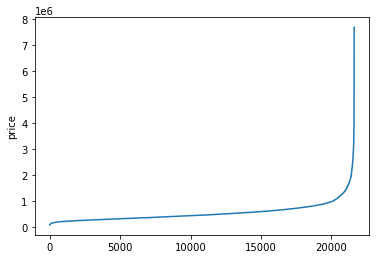

In [25]:
df_sorted = df.sort_values(by='price', 
        ascending=True)# 7.7e+06 75000
sns.lineplot(x=np.linspace(0,21613, 21613), y=df_sorted['price'])

Как видим, большинство домов стоят не более 1 млн. Пока сложно сказать, повлияет ли малое число обучающих примеров из высокого ценового сегмента на качество прогноза

Отобразим корреляцию атрибутов

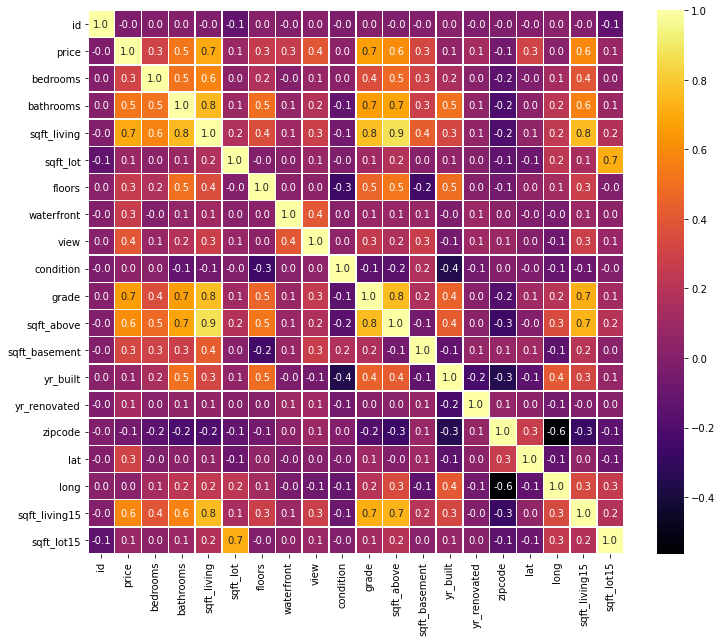

In [26]:
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="inferno", linewidths=.5, fmt= '.1f',ax=ax);

По западу округа Кинг проходит пролив, преимущественно города располагаются вдоль этого пролива. Координаты долготы не коррелируют с ценой, возможно, из-за вышеприведенного факта. Этого нельзя сказать о широте, однако, от координат можно попробовать отказаться в дальнейшем, так как у нас есть индекс каждого из представленных домов. Так же **слабо коррелируют** с ценой: 
* площадь земельного участка (квартиры или маленькие дома в центре округа могут стоить дороже, чем земельный участок на окраине), 
* год постройки, 
* год последнего ремонта дома, 
* индекс(из-за его неупорядоченной выдачи различным районам), 
* площадь земельного участка ближайших соседей(из-за аналогичной причины у площади земельного участка)

и, как это ни странно, состояние дома. В сочетании год последнего ремонта и год постройки могут дать важную информацию о цене на старые дома



К **важным** признакам можно отнести *все остальные атрибуты* (за исключением id), а особенно 
* жил. площадь соседей, 
* жил. площадь без цокольного этажа, 
* качество проектирования, 
* вид из дома, 
* жил. площадь квартиры (дома),
* число ванных комнат. 


Итак, к **избыточным признакам** можно отнести 
* id, 
* площадь земельного участка соседей (сильно коррелирет с земельным участком продавца и ничем другим),
* широта и долгота (с учетом использования индекса),
* жил. площадь цокольного этажа (т.к. у нас есть общая жил. площадь и их разность)
* дата (все сделки совершены в течении одного года, курс недвижимости не смещался за это время)

In [54]:
df = df.drop(columns=['id', 'sqft_lot15', 'lat', 'long', 'sqft_basement', 'date'])
y = df.pop('price')
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

Отобразим зависимость цены от двух наиболее важных параметров: число этажей и жил. площадь.

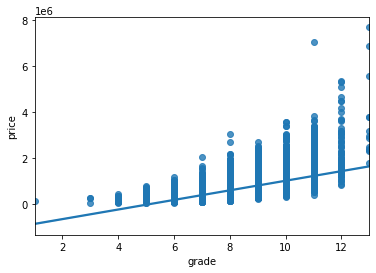

In [30]:
sns.regplot(x="grade", y="price", data=df);

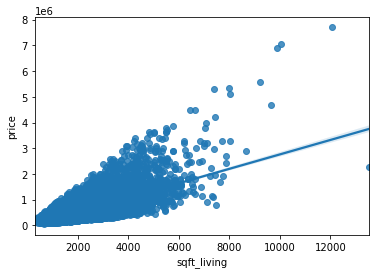

In [31]:
sns.regplot(x="sqft_living", y="price", data=df);

## Метод kNN

In [81]:
knn_model = KNeighborsRegressor(n_neighbors=12)
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_prediction)
print(f"RMSE = {np.sqrt(knn_mse)}")

RMSE = 245658.01638639395


Довольно большая ошибка с учетом того, что на эти деньги можно купить 3 самых дешевых дома, а средняя цена по округу составляет 500 000

Text(0, 0.5, 'Predicted')

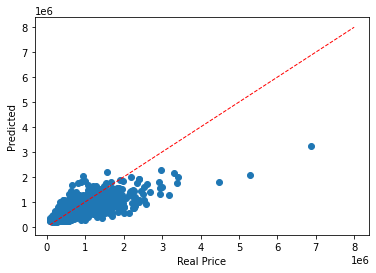

In [80]:
plt.scatter(y_test, knn_model.predict(X_test))
plt.plot([y_test.min(), 8e6], [y_test.min(), 8e6], 'r--', lw=1)
plt.xlabel('Real Price')
plt.ylabel('Predicted')

Как видим,реальная цена практически всегда оказывается больше предсказанной, особенно это видно на жилье элитного класса. В связи с этим лучше испольвать MAE как более стойкую метрику к огромным ошибкам

In [93]:
knn_mae = mean_absolute_error(y_test, knn_prediction)
print(f"MAE = {knn_mae}")

MAE = 152163.61431104943


Уже не так плохо

## Линейная регрессия

In [95]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_prediction = lin_model.predict(X_test)
lin_mae = mean_absolute_error(y_test, lin_prediction)
print(f"MAE = {lin_mse}")

MAE = 141782.00714693355


Text(0, 0.5, 'Predicted')

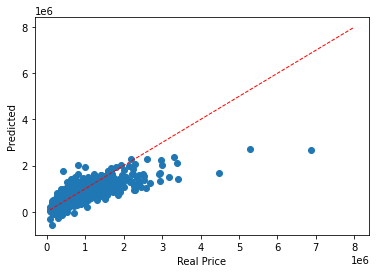

In [96]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.plot([y_test.min(), 8e6], [y_test.min(), 8e6], 'r--', lw=1)
plt.xlabel('Real Price')
plt.ylabel('Predicted')

Уже лучше, но алгоритм все равно недооценивает большую часть домов. Посмотрим на коэффициенты регрессии

In [97]:
pd.DataFrame(lin_model.coef_, index=df.columns, columns=['coef']).sort_values(by=['coef'], ascending= False)

coef
waterfront     585255.740495
grade          121058.180864
bathrooms       44204.814299
view            41413.865015
floors          31019.019945
condition       18585.683507
sqft_living       167.587175
zipcode            31.511902
sqft_living15      24.159087
yr_renovated       13.212358
sqft_lot           -0.291804
sqft_above        -10.528084
yr_built        -3592.347624
bedrooms       -38256.172649

## Метод опорных векторов

In [102]:
svr_model = make_pipeline(StandardScaler(), SVR(C=2.5, epsilon=0.2))
svr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=2.5, epsilon=0.2))])

In [103]:
svr_prediction = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, lin_prediction)
print(f"MAE = {svr_mae}")

MAE = 141782.00714693355


Text(0, 0.5, 'Predicted')

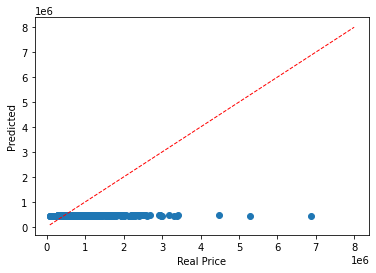

In [104]:
plt.scatter(y_test, svr_model.predict(X_test))
plt.plot([y_test.min(), 8e6], [y_test.min(), 8e6], 'r--', lw=1)
plt.xlabel('Real Price')
plt.ylabel('Predicted')